# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

План работы:   
* Изучить данные, обработать пропущенные значения и дубликаты, исправить аномальные значения  
* Добавить в таблицу новые переменные, которые помогут проанализировать рынок недвижимости  
* Изучить, как быстро продаются квартиры  
* Выявить факторы, которые влияют на стоимость объектов   
* Выделить населённые пункты с самой высокой и низкой стоимостью квадратного метра  
* Выявить зависимость стоимости квартир от расстояния до центра города в Санкт-Петербурге  

### Откройте файл с данными и изучите общую информацию. 

Загрузим данные и посмотрим на первые пять строк датасета:

In [1]:
import pandas as pd
data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


Выведем общую информацию о датасете. Всего в датасете 23699 строк и 22 столбцов, из них 2 переменные имеют булев тип данных, 14 - вещественный, 3 - целочисленный и 3 переменных заданы в виде строк.

In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

Построим гистограммы для числовых переменных.

array([[<AxesSubplot:title={'center':'total_images'}>,
        <AxesSubplot:title={'center':'last_price'}>,
        <AxesSubplot:title={'center':'total_area'}>,
        <AxesSubplot:title={'center':'rooms'}>],
       [<AxesSubplot:title={'center':'ceiling_height'}>,
        <AxesSubplot:title={'center':'floors_total'}>,
        <AxesSubplot:title={'center':'living_area'}>,
        <AxesSubplot:title={'center':'floor'}>],
       [<AxesSubplot:title={'center':'kitchen_area'}>,
        <AxesSubplot:title={'center':'balcony'}>,
        <AxesSubplot:title={'center':'airports_nearest'}>,
        <AxesSubplot:title={'center':'cityCenters_nearest'}>],
       [<AxesSubplot:title={'center':'parks_around3000'}>,
        <AxesSubplot:title={'center':'parks_nearest'}>,
        <AxesSubplot:title={'center':'ponds_around3000'}>,
        <AxesSubplot:title={'center':'ponds_nearest'}>],
       [<AxesSubplot:title={'center':'days_exposition'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], d

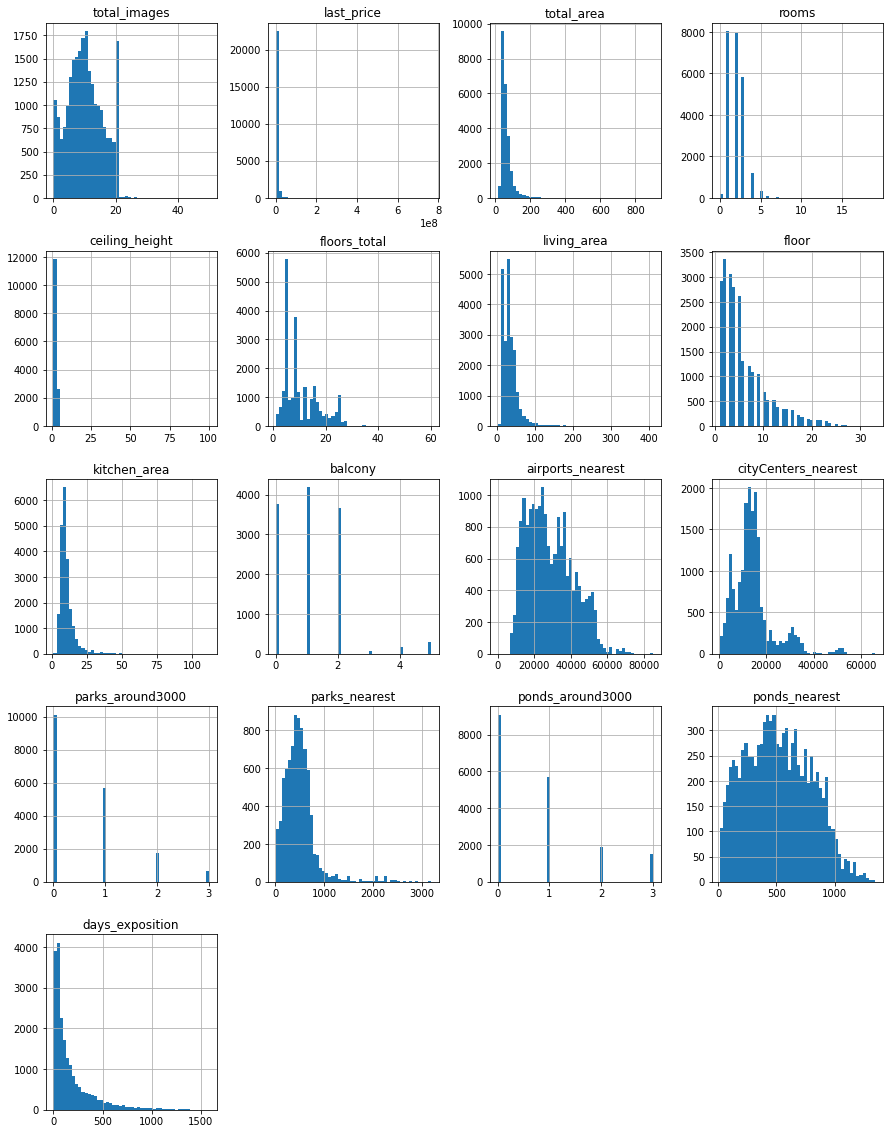

In [3]:
data.hist(figsize=(15, 20), bins=50)

По общей инфомации видно, что в данных достаточно много пропусков. Также из гистограм видно, что в данных пристутствуют аномальные значения, например 100 метровые потолки, квартира в 0 метрах от аэоропорта и др.

### Предобработка данных

#### Обработка пропущенных значений

Посмотрим, есть ли пропущенные значения в датасете.

In [4]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

Наименьшее количество пропусков содержится в переменных floors_total (0.36% от всех данных) и locality_name (0.21%), их количество крайне мало, поэтому мы можем удалить эти строки из датасета.

In [5]:
data = data.loc[data['floors_total'].isna()==False].reset_index(drop=True)
data = data.loc[data['locality_name'].isna()==False].reset_index(drop=True)

Пропуски в значениях высот потолков составляют около 40% от всех данных, что является довольно большой частью. Они могли возникнуть так и по причине не заполнения полей в объявлении, так и если потолки типовой высоты. Если мы заменим такую большую часть искусственными данными, то можем потерять реальную картину, что плохо скажется на дальнейшем исследовании.

Также содержатся пропуски в переменной days_exposition, которая показывает сколько дней висело объявление. Такие пропуски могли возникнуть, если объявления не были закрыты при продаже, причем это могло произойти как из-за того, что продавец просто забыл закрыть его, так и если объявление свежее (мы видим, что есть пропуски как и в 2014 году, так и в 2019). В таком случае нельзя корректно заполнить пропуски в данных, поэтому мы их оставим.

In [7]:
data.loc[data['days_exposition'].isna()==True]['first_day_exposition'].sort_values()

3277     2014-11-27T00:00:00
3855     2014-11-27T00:00:00
15770    2014-11-27T00:00:00
6887     2014-12-08T00:00:00
10993    2014-12-09T00:00:00
                ...         
17771    2019-05-03T00:00:00
12274    2019-05-03T00:00:00
12310    2019-05-03T00:00:00
14986    2019-05-03T00:00:00
15793    2019-05-03T00:00:00
Name: first_day_exposition, Length: 3171, dtype: object

Наблюдаются пропуски в заполнении данных площадей кухонь и жилых площадей, в данном случае нельзя корректно восстановить данные значения в силу того, что медианное значение может сильно отличаться от реальной картины, что может пагубно повлиять, например, на исследования влияния площадей на стоимость квартиры. Кроме того при таком заполнении есть шанс получить общую площаль, значительно отличающуюся от total_area.

Также имеются пропуски в географических данных (переменные airports_nearest, parks_nearest, ponds_nearest, cityCenters_nearest. Эти пропущенные значения могли возникнуть как из-за ошибки в сборе данных, так и по причине того, что объекты находятся слишком далеко от помещения. Такие пропуски нельзя корректно восстановить, поэтому мы их оставим.

Далее перейдем к пропускам в переменной is_apartment. Переменная принимает два значения: True и False, скорее всего пропуски данных связаны с тем, что для помещений, не являющихся апартаментами, пользователи указывали не False, а просто пропускали эту строку в данных, поэтому заменим все пропущенные значения на False.

In [8]:
data['is_apartment'] = data['is_apartment'].fillna(False)

Много пропущенных значений наблюдается в переменной balcony, которое указывает на количество балконов. Пропуски могут быть связаны с тем, что балконов нет в помещении, поэтому заменим все пропуски на 0.

In [9]:
data['balcony'] = data['balcony'].fillna(0)

Также достаточно много пропусков содержится в parks_around3000 и ponds_around3000, отвечающие за количество парков и мостов соответсвенно в радиусе 3 км. Пропуски связаны с тем, что объекты отстутвуют в заданном радиусе, поэтому заменим их на 0.

In [10]:
data['parks_around3000'] = data['parks_around3000'].fillna(0)
data['ponds_around3000'] = data['ponds_around3000'].fillna(0)

#### Корректировка типа данных

Далее посмотрим для всех ли переменных задан корректный тип данных.

In [11]:
data.dtypes

total_images              int64
last_price              float64
total_area              float64
first_day_exposition     object
rooms                     int64
ceiling_height          float64
floors_total            float64
living_area             float64
floor                     int64
is_apartment               bool
studio                     bool
open_plan                  bool
kitchen_area            float64
balcony                 float64
locality_name            object
airports_nearest        float64
cityCenters_nearest     float64
parks_around3000        float64
parks_nearest           float64
ponds_around3000        float64
ponds_nearest           float64
days_exposition         float64
dtype: object

В столбце first_day_exposition дата указана в формате строки, переведем данные в формат даты.

In [12]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

Также есть количественные переменные, которые сейчас представленны в вещественном типе (floors_total, balcony, parks_around3000, ponds_around3000), они измеряются в штуках, поэтому переведем их в целочисленный формат.

In [13]:
data['floors_total'] = data['floors_total'].astype('int')
data['balcony'] = data['balcony'].astype('int')
data['parks_around3000'] = data['parks_around3000'].astype('int')
data['ponds_around3000'] = data['ponds_around3000'].astype('int')

В целочисленный формат можно тажке перевести days_exposition.

In [14]:
data['days_exposition'] = pd.to_numeric(data['days_exposition'], errors='coerce')

#### Удаление дубликатов

И наконец перейдем к проверки данных на дубликаты в столбце с названиями населенного пункта, для начала посмотрим на уникальные значения столбца, чтобы избежать дубликатов, возникающих из-за разных регистров, для начала переведем все названия к нижнему регистру.

In [15]:
data['locality_name'] = data['locality_name'].str.lower()
data['locality_name'].unique()

array(['санкт-петербург', 'посёлок шушары', 'городской посёлок янино-1',
       'посёлок парголово', 'посёлок мурино', 'ломоносов', 'сертолово',
       'петергоф', 'пушкин', 'деревня кудрово', 'коммунар', 'колпино',
       'поселок городского типа красный бор', 'гатчина', 'поселок мурино',
       'деревня фёдоровское', 'выборг', 'кронштадт', 'кировск',
       'деревня новое девяткино', 'посёлок металлострой',
       'посёлок городского типа лебяжье',
       'посёлок городского типа сиверский', 'поселок молодцово',
       'поселок городского типа кузьмоловский',
       'садовое товарищество новая ропша', 'павловск',
       'деревня пикколово', 'всеволожск', 'волхов', 'кингисепп',
       'приозерск', 'сестрорецк', 'деревня куттузи', 'посёлок аннино',
       'поселок городского типа ефимовский', 'посёлок плодовое',
       'деревня заклинье', 'поселок торковичи', 'поселок первомайское',
       'красное село', 'посёлок понтонный', 'сясьстрой', 'деревня старая',
       'деревня лесколово', '

Мы видим, что дублируются названия, где есть буквы е/ё (поселок-посёлок), заменим в названиях все ё на е.

In [16]:
data['locality_name'] = data['locality_name'].str.replace('ё', 'е')
data['locality_name'].unique()

array(['санкт-петербург', 'поселок шушары', 'городской поселок янино-1',
       'поселок парголово', 'поселок мурино', 'ломоносов', 'сертолово',
       'петергоф', 'пушкин', 'деревня кудрово', 'коммунар', 'колпино',
       'поселок городского типа красный бор', 'гатчина',
       'деревня федоровское', 'выборг', 'кронштадт', 'кировск',
       'деревня новое девяткино', 'поселок металлострой',
       'поселок городского типа лебяжье',
       'поселок городского типа сиверский', 'поселок молодцово',
       'поселок городского типа кузьмоловский',
       'садовое товарищество новая ропша', 'павловск',
       'деревня пикколово', 'всеволожск', 'волхов', 'кингисепп',
       'приозерск', 'сестрорецк', 'деревня куттузи', 'поселок аннино',
       'поселок городского типа ефимовский', 'поселок плодовое',
       'деревня заклинье', 'поселок торковичи', 'поселок первомайское',
       'красное село', 'поселок понтонный', 'сясьстрой', 'деревня старая',
       'деревня лесколово', 'поселок новый свет

#### Обработка аномальных значений

И наконец, посмотрим на описание данных, чтобы понять есть ли у нас редкие и выбивающиеся значения.

In [17]:
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23565.000000,2.356500e+04,23565.000000,23565.000000,14481.000000,23565.000000,21700.000000,23565.000000,21343.000000,23565.000000,18041.000000,18064.000000,23565.000000,8030.000000,23565.000000,9036.000000,20394.000000
mean,9.878421,6.540058e+06,60.322824,2.070656,2.771283,10.675875,34.454822,5.878124,10.560994,0.593677,28797.082701,14192.656056,0.468831,490.580448,0.589900,518.289509,180.741395
std,5.681156,1.091093e+07,35.657060,1.078591,1.261983,6.594823,22.045359,4.871485,5.900630,0.960660,12632.499735,8613.348153,0.748403,341.572956,0.883966,278.009558,219.732782
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.510000,5.000000,18.600000,2.000000,7.000000,0.000000,18565.000000,9238.000000,0.000000,288.000000,0.000000,293.000000,45.000000
50%,9.000000,4.646000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,0.000000,26757.000000,13096.500000,0.000000,455.000000,0.000000,503.000000,95.000000
75%,14.000000,6.790000e+06,69.700000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,1.000000,37273.000000,16285.000000,1.000000,612.000000,1.000000,730.000000,231.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


Мы видим выбивающиеся значения в переменной ceiling_height, максимальное значение высоты потолка достигает 100м, что не похоже на реальное значение, скорее всего в таких значениях пропущена точка (10.0м). Учитывая, что потолки обычно имеют высоту от 2м до около 10-15м, то отфильтруем значения переменной, где они будут больше 20.

In [18]:
data.loc[data['ceiling_height'] >= 20]['ceiling_height']

353       25.0
3134      32.0
4621      25.0
4852      27.0
5051      24.0
5219      27.0
5641      26.0
5777      27.0
6213      25.0
9334      25.0
10713     27.0
11221     25.0
14298     25.0
17399     20.0
17756     27.0
18442     25.0
20364     27.0
20393     22.6
21256     27.5
21700     27.0
22211     32.0
22739    100.0
22807     27.0
Name: ceiling_height, dtype: float64

Мы получили 23 строки с анломальными значениями, исправим ошибки в данных путем деления таких чисел на 10.

In [19]:
def ceiling(height):
    if height >= 20:
        height = round(height/10, 2)
    return height
        
data['ceiling_height'] = data['ceiling_height'].apply(ceiling)
data['ceiling_height'].describe()

count    14481.000000
mean         2.729325
std          0.319779
min          1.000000
25%          2.510000
50%          2.650000
75%          2.800000
max         14.000000
Name: ceiling_height, dtype: float64

Также мы видим, что минимальное значение жилой площади в датасете равно 2 кв метрам, что не может быть нормальным значением, ведь по закону минимально на 1 человека может приходится как минимум 12 кв метров. Возможно, при записи площади была совершена ошибка в написании, могли как и не написать еще одно число, так и поставить точку в другом месте, посмотрим много ли таких значений:

In [20]:
data.loc[data['living_area'] < 12]['living_area']

6        10.60
114       8.30
246      10.00
612      10.00
676       9.00
         ...  
22883    10.90
23077     8.00
23227    10.00
23349    10.08
23442     3.00
Name: living_area, Length: 128, dtype: float64

Таких наблюдений 128, что составляет небольшую часть информации, поэтому удалим эти строки.

In [21]:
data = data.loc[data['living_area'] >= 12]

Также странным кажется, что есть объекты, которые имеют расстояние до аэропорта 0 метров, удалим это значение.

In [22]:
data.loc[data['airports_nearest'] == 0]['airports_nearest']

20968    0.0
Name: airports_nearest, dtype: float64

Такое значение лишь одно, поэтому мы смело можем удалить его из датасета.

In [23]:
data = data.loc[data['airports_nearest'] > 0]

### Посчитайте и добавьте в таблицу новые столбцы

Далее добавим в датасет несколько столбцов, которые помогут для анализа данных.

#### Цена одного квадратного метра

In [25]:
data['price_for_meter'] = data['last_price']/data['total_area']

#### День недели публикации объявления

In [26]:
data['publication_day'] = pd.DatetimeIndex(data['first_day_exposition']).weekday

#### Месяц публикации объявления

In [27]:
data['publication_month'] = pd.DatetimeIndex(data['first_day_exposition']).month

#### Год публикации объявления

In [28]:
data['publication_year'] = pd.DatetimeIndex(data['first_day_exposition']).year

#### Тип этажа квартиры

In [29]:
def floor_type(df):
    if df['floor'] == 1:
        return 'первый'
    elif df['floor'] == df['floors_total']:
        return 'последний'
    return 'другой'

In [30]:
data['floor_type'] = data.apply(floor_type, axis=1)

#### Расстояние до центра города в километрах

In [31]:
data['center_distance'] = round(data['cityCenters_nearest']/1000, 0)

In [32]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_for_meter,publication_day,publication_month,publication_year,floor_type,center_distance
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.0,8,False,...,482.0,2,755.0,NaN,120370.370370,3,3,2019,другой,16.0
1,7,3350000.0,40.4,2018-12-04,1,NaN,11,18.6,1,False,...,NaN,0,NaN,81.0,82920.792079,1,12,2018,первый,19.0
2,10,5196000.0,56.0,2015-08-20,2,NaN,5,34.3,4,False,...,90.0,2,574.0,558.0,92785.714286,3,8,2015,другой,14.0
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.0,13,False,...,112.0,1,48.0,121.0,100000.000000,1,6,2018,другой,8.0
9,18,5400000.0,61.0,2017-02-26,3,2.50,9,43.6,7,False,...,NaN,0,NaN,289.0,88524.590164,6,2,2017,другой,15.0


### Проведите исследовательский анализ данных

#### Изучение параментов объектов

##### Общая площадь

In [33]:
data['total_area'].describe()

count    16695.000000
mean        63.001880
std         37.325273
min         16.000000
25%         41.300000
50%         54.100000
75%         72.900000
max        900.000000
Name: total_area, dtype: float64

<AxesSubplot:>

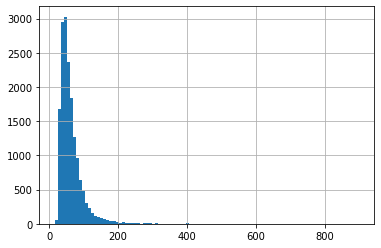

In [34]:
data['total_area'].hist(bins=100)

Переменная имеет значения, находящиеся в диапазоне от 16 до 900. Больше всего значений площадей обектов находится в районе 54 кв метров, также из гистрограммы видно, что площади более 200 кв метром довольно редки.

##### Жилая площадь

In [35]:
data['living_area'].describe()

count    16695.000000
mean        36.226644
std         23.571972
min         12.000000
25%         19.300000
50%         31.000000
75%         43.600000
max        409.700000
Name: living_area, dtype: float64

<AxesSubplot:>

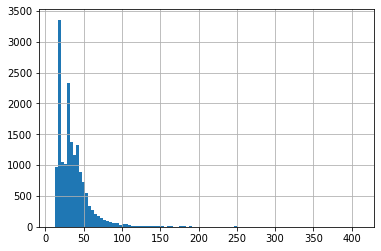

In [36]:
data['living_area'].hist(bins=100)

Значения жилой площади варьируются от 12 до 409.7 кв метров. Чаще всего жилая площадь составляет около 30 кв метров, а также достаточно много значений равных примерно 15 кв метрам, редкими можно назвать значения от 120 кв метров.

##### Площадь кухни

In [37]:
data['kitchen_area'].describe()

count    16158.000000
mean        10.852674
std          6.264844
min          1.300000
25%          7.000000
50%          9.500000
75%         12.000000
max        112.000000
Name: kitchen_area, dtype: float64

<AxesSubplot:>

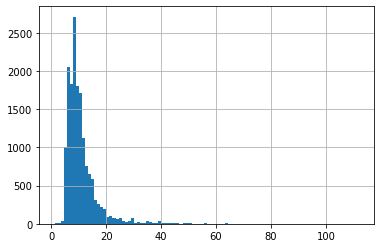

In [38]:
data['kitchen_area'].hist(bins=100)

Значения площадей кухонь находятся в диапозоне от 1.3 до 112 кв метров. Чаще всего встречаются объекты с площадью кухни в 10 кв метров, редко можно встретить кухни меньше 5 кв метров, а также более 30 кв метров.

##### Цена объекта

In [39]:
data['last_price'].describe()

count    1.669500e+04
mean     7.474588e+06
std      1.208855e+07
min      1.219000e+04
25%      4.000000e+06
50%      5.250000e+06
75%      7.600000e+06
max      7.630000e+08
Name: last_price, dtype: float64

<AxesSubplot:>

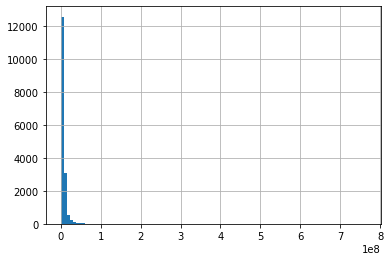

In [40]:
data['last_price'].hist(bins=100)

Цены на объекты варьируются от 12190 до 763000000 рублей. В основном значения стоимости объектов концентрируется около 4650000.

##### Количество комнат

In [41]:
data['rooms'].describe()

count    16695.000000
mean         2.145852
std          1.122642
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

In [42]:
data['rooms'].value_counts()

2     5485
1     5331
3     4353
4      973
5      269
0      108
6       95
7       51
8       12
9        7
10       3
11       2
14       2
19       1
16       1
12       1
15       1
Name: rooms, dtype: int64

<AxesSubplot:>

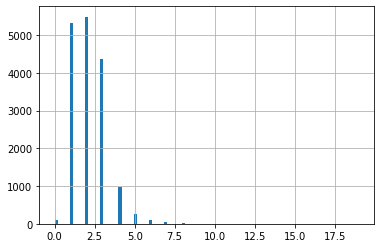

In [43]:
data['rooms'].hist(bins=100)

Больше всего объектов с 1-2 комнатами, они составляют основную часть датасета, редко встречаются объекты с более 6 комнатами.

##### Высота потолков

In [44]:
data['ceiling_height'].describe()

count    10887.000000
mean         2.750318
std          0.337921
min          1.000000
25%          2.550000
50%          2.650000
75%          2.800000
max         14.000000
Name: ceiling_height, dtype: float64

<AxesSubplot:>

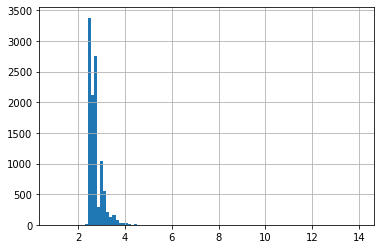

In [45]:
data['ceiling_height'].hist(bins=100)

Высота потолков объектов варьируется от 1 до 14 метров, чаще всего можно встретить потолки около 2.65 метров, очень редко - полотки от 4 метров высотой.

##### Этаж квартиры

In [46]:
data['floor'].describe()

count    16695.000000
mean         6.096496
std          4.900089
min          1.000000
25%          3.000000
50%          5.000000
75%          8.000000
max         33.000000
Name: floor, dtype: float64

<AxesSubplot:>

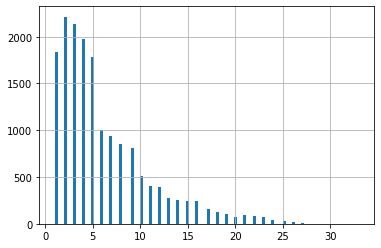

In [47]:
data['floor'].hist(bins=100)

В датасете представлена информация об объектах, которые находятся на 1-33 этажах. Большая часть объектов расположена на 1-5 этажах, редко встречаются объекты на более чем 25 этажах.

##### Тип этажа квартиры

In [48]:
data['floor_type'].value_counts()

другой       12678
последний     2179
первый        1838
Name: floor_type, dtype: int64

<AxesSubplot:>

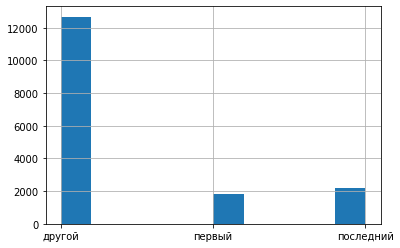

In [49]:
data['floor_type'].hist(bins=10)

Преимущественно даны объекты которые имеют "другой" тип этажа, далее по частоте идут последние этажи, меньше встречаются объекты на первых этажах.

##### Общее количество этажей в доме

In [50]:
data['floors_total'].describe()

count    16695.000000
mean        11.089188
std          6.484031
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64

<AxesSubplot:>

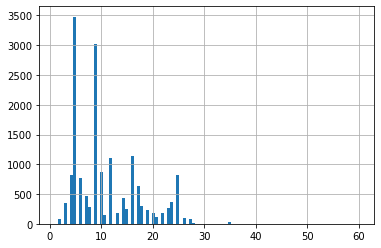

In [51]:
data['floors_total'].hist(bins=100)

В основном встречаются объекты в домах с 5 этажами, также достаточно много объектов в девятиэтажках, очень редко встречаются объекты в домах с более чем 30 этажами.

##### Расстояние до центра города в метрах

In [52]:
data['cityCenters_nearest'].describe()

count    16694.000000
mean     14235.886306
std       8673.303052
min        181.000000
25%       9304.000000
50%      13105.000000
75%      16252.500000
max      65968.000000
Name: cityCenters_nearest, dtype: float64

<AxesSubplot:>

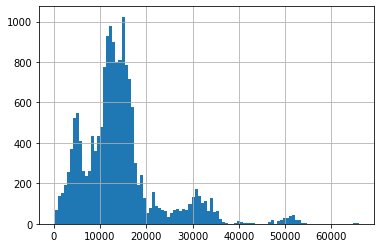

In [53]:
data['cityCenters_nearest'].hist(bins=100)

Расстояния от объекта до центра города варьируются от 181м до 65968м. Больше всего объектов, которые расположены в пределах примерно 10000-17000м от центра.

##### Расстояние до ближайшего аэропорта

In [54]:
data['airports_nearest'].describe()

count    16695.000000
mean     28758.091704
std      12645.722169
min       6450.000000
25%      18501.500000
50%      26674.000000
75%      37227.000000
max      84869.000000
Name: airports_nearest, dtype: float64

<AxesSubplot:>

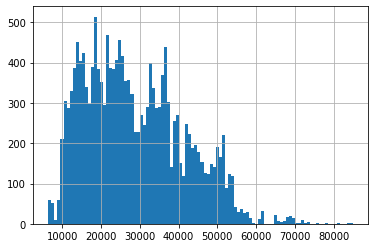

In [55]:
data['airports_nearest'].hist(bins=100)

Расстояния до ближайших аэропортов варьируются от 6450 до 84869, большая часть объектов расположена на расстоянии около 19000м от аэропорта.

##### Расстояние до до ближайшего парка

In [56]:
data['parks_nearest'].describe()

count    7405.000000
mean      487.925321
std       337.439886
min         1.000000
25%       288.000000
50%       452.000000
75%       610.000000
max      3190.000000
Name: parks_nearest, dtype: float64

<AxesSubplot:>

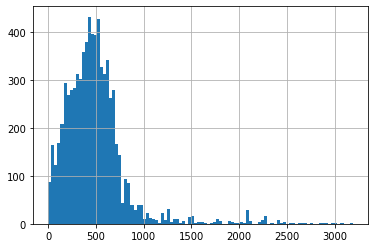

In [57]:
data['parks_nearest'].hist(bins=100)

В данных имеются объекты расположеные около парка (расстояние равно 1м), так и очень далеко от парка (3190м). Большая часть объектов расположена примерно в 290-600м от парка.

##### День и месяц публикации объявления

In [58]:
data['publication_day'].value_counts()

3    3055
1    2992
4    2853
2    2794
0    2564
5    1292
6    1145
Name: publication_day, dtype: int64

<AxesSubplot:>

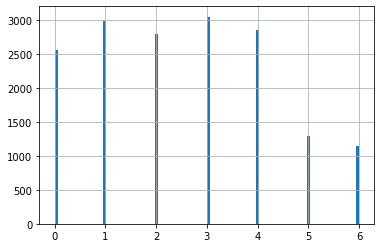

In [59]:
data['publication_day'].hist(bins=100)

Чаще всего объявления публиковали в четверг и вторник, меньше всего публикаций приходилось на выходные.

In [60]:
data['publication_month'].value_counts()

2     1846
3     1759
11    1735
4     1711
10    1526
9     1450
8     1255
6     1248
7     1192
12    1040
1      998
5      935
Name: publication_month, dtype: int64

<AxesSubplot:>

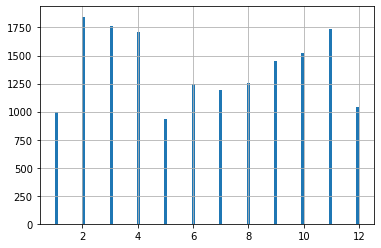

In [61]:
data['publication_month'].hist(bins=100)

Большая часть объявлений была опубликована в ферале-марте, реже всего делают публикации в мае.

#### Анализ скорости продажи квартир

<AxesSubplot:>

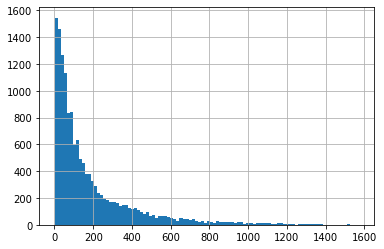

In [62]:
data['days_exposition'].hist(bins=100)

In [63]:
data['days_exposition'].describe()

count    14526.000000
mean       184.912984
std        224.488834
min          1.000000
25%         42.000000
50%        100.000000
75%        238.000000
max       1572.000000
Name: days_exposition, dtype: float64

In [64]:
print('Среднее значение переменной, отвечающией за количество дней, в течение которых было вывешено объявление:', data['days_exposition'].mean())
print('Медиана переменной', data['days_exposition'].median())

Среднее значение переменной, отвечающией за количество дней, в течение которых было вывешено объявление: 184.91298361558586
Медиана переменной 100.0


Значения медианы и среднего days_exposition значительно отличаются, это вызвано тем, что в данных есть выбросы (которые учитывает среднее, медиана же к ним устойчива). Продажа объекта обычно занимает около 95 дней.

Необычайно долгие продажи будут лежать за 3 квантилем, то есть они будут занимать более 238 дней. Быстрыми же продажи будут считаться, если они занимают менее 42 дней.

#### Факторы, влияющие на стоимость объекта

##### Общая площадь объекта

Так как обе переменные количественные, мы можем расчитать корреляцию между ними:

In [65]:
data['last_price'].corr(data['total_area'])

0.6368032159730384

<AxesSubplot:xlabel='total_area', ylabel='last_price'>

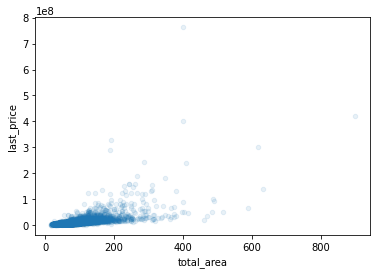

In [66]:
data.plot(y='last_price', x='total_area', kind='scatter', alpha=0.1) 

Значение корреляции между ценой объекта и его общей площадью достаточно высоко (0,65). Глядя на диаграмму рассеивания, мы видим, что по мере возрастания общей площади увеличивается цена (не считая некоторых выбросов).

##### Жилая площадь

In [67]:
data['last_price'].corr(data['living_area'])

0.5656080929767803

<AxesSubplot:xlabel='living_area', ylabel='last_price'>

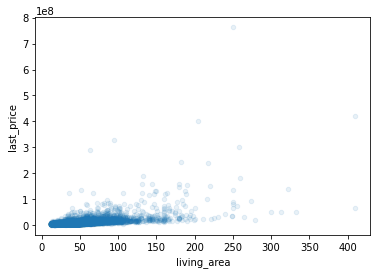

In [68]:
data.plot(y='last_price', x='living_area', kind='scatter', alpha=0.1) 

Размер жилой площади тоже влияет на цену объекта, но уже меньше, чем его общая площадь (0,54 против 0,65).

##### Площадь кухни

In [69]:
data['last_price'].corr(data['kitchen_area'])

0.5186885739863913

<AxesSubplot:xlabel='kitchen_area', ylabel='last_price'>

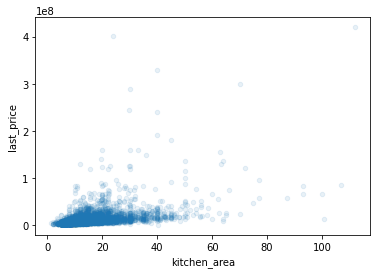

In [70]:
data.plot(y='last_price', x='kitchen_area', kind='scatter', alpha=0.1) 

Площадь кухни уже не так сильно влияет на стоимоть объекта как жилая площадь или общая площадь объекта (в данном случае коэффициент корреляции равен 0,44), однако стоит отметить, что взаимосвязь, хоть и не слишком сильная, прослеживается.

##### Количество комнат

In [71]:
data['last_price'].corr(data['rooms'])

0.36528682924115946

<AxesSubplot:xlabel='rooms', ylabel='last_price'>

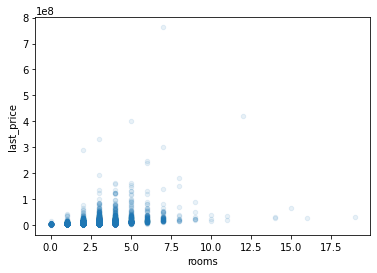

In [72]:
data.plot(y='last_price', x='rooms', kind='scatter', alpha=0.1) 

Количество комнат, которое имеет объект, слабо влияет на цену (значение корреляции равно 0.37). Это видно также из графика: до 5 комнат цена последовательно растет, однако далее мы видим убывание цены.

##### Тип этажа

In [73]:
data.groupby('floor_type')['last_price'].mean()

floor_type
другой       7.440198e+06
первый       5.819899e+06
последний    9.070420e+06
Name: last_price, dtype: float64

<AxesSubplot:xlabel='floor_type'>

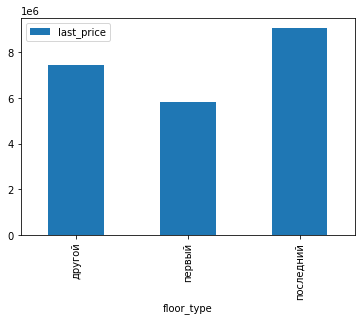

In [74]:
data.pivot_table(index='floor_type', values='last_price', aggfunc='mean').plot(kind='bar')

Взаимосвязь между типом этажа и ценой объекта прослеживается. Так, средняя стоимость объектов на первых этажах ялвяется наименьшей, далее идут объекты на других этажах, а на последних этажах располагаются самые дорогие объекты.

##### Дата размещения

<AxesSubplot:xlabel='publication_day'>

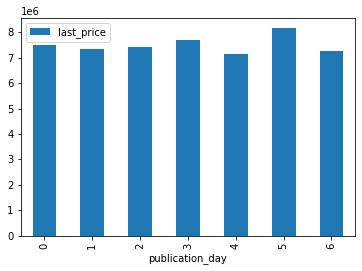

In [75]:
data.pivot_table(index='publication_day', values='last_price', aggfunc='mean').plot(kind='bar')

Средняя цена объектов, публикации которых были в субботу, является самой высокой, однако цены в остальные дни практически не отличаются, следовательно день размещения слабо влияет на стоимость объекта.

<AxesSubplot:xlabel='publication_month'>

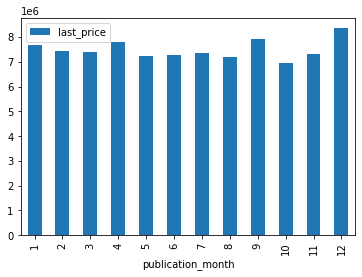

In [76]:
data.pivot_table(index='publication_month', values='last_price', aggfunc='mean').plot(kind='bar')

Мы видим не очень сильную корреляцию между месяцем публикации и ценой объекта, однако тут можно отметить, что средняя цена объектов в декабре яляется наибольшей, а в октябре - наименьшей.

<AxesSubplot:xlabel='publication_year'>

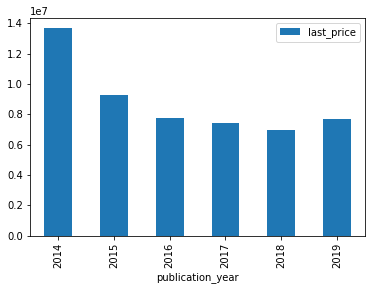

In [77]:
data.pivot_table(index='publication_year', values='last_price', aggfunc='mean').plot(kind='bar')

Прослеживается снижение стоимости обектов по мере повышения года (кроме 2019 года), наиболее дорогими объекты были в 2014 году, а в 2018 средняя цена была наименьшей.

**Вывод:** показателями, оказывающими достаточно сильное влияение на формирование стоимости объектов, являются общая площадь, тип этажа а также год публикации объявления о продаже.

#### Средняя цена одного квадратного метра

Для простоты поделим цену на 1000, далее будем измерять цену в тыс руб.

In [79]:
data['last_price'] = data['last_price']/1000

In [80]:
data['price_meter'] = data['last_price']/data['total_area']

In [81]:
data['price_meter'].describe()

count    16695.000000
mean       109.965550
std         49.383920
min          0.111835
25%         87.333333
50%        101.420455
75%        120.242041
max       1907.500000
Name: price_meter, dtype: float64

<AxesSubplot:>

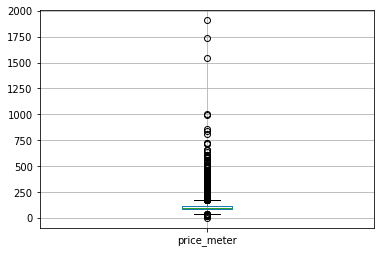

In [82]:
data.boxplot(column=['price_meter'])

Удалим выбросы из данных, это будут значения, которые наиболее явно выбиваются из общей картины. На графике выше есть кружки - выбросы, стоит заметить, что они достаточно плотно распределены до 750, поэтому оставим эту часть. Проверим, много ли данных находится выше 750. Таких значений всего 8, поэтому мы их можем удалить:

In [83]:
data.loc[data['price_meter'] > 750]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,price_for_meter,publication_day,publication_month,publication_year,floor_type,center_distance,price_meter
1431,19,330000.0,190.0,2018-04-04,3,3.50,7,95.0,5,False,...,3,285.0,233.0,1.736842e+06,2,4,2018,другой,1.0,1736.842105
4971,20,124000.0,124.5,2017-10-12,4,3.00,4,67.2,2,False,...,3,172.0,45.0,9.959839e+05,3,10,2017,другой,2.0,995.983936
12897,19,763000.0,400.0,2017-09-30,7,NaN,10,250.0,10,False,...,3,756.0,33.0,1.907500e+06,5,9,2017,последний,4.0,1907.500000
14621,15,401300.0,401.0,2016-02-20,5,NaN,9,204.0,9,False,...,1,478.0,393.0,1.000748e+06,5,2,2016,последний,2.0,1000.748130
16372,17,245000.0,285.7,2017-04-10,6,3.35,7,182.8,4,False,...,3,140.0,249.0,8.575429e+05,0,4,2017,другой,6.0,857.542877
16552,15,122000.0,145.0,2017-04-25,3,3.30,6,36.0,2,False,...,3,250.0,335.0,8.413793e+05,1,4,2017,другой,7.0,841.379310
17811,17,135000.0,166.0,2019-02-07,3,3.30,7,52.0,1,False,...,3,215.0,NaN,8.132530e+05,3,2,2019,первый,6.0,813.253012
22701,18,289238.4,187.5,2019-03-19,2,3.37,6,63.7,6,False,...,3,188.0,NaN,1.542605e+06,1,3,2019,последний,1.0,1542.604800


In [84]:
locality = data.loc[data['price_meter'] < 750]

In [85]:
locality = locality.pivot_table(index='locality_name', values='price_meter', aggfunc=['count', 'mean'])
locality.columns = ['count', 'mean']
locality = locality.sort_values(by='count', ascending=False).head(10)
locality

,count,mean
locality_name,,
санкт-петербург,14381,113.342639
поселок шушары,393,78.341625
пушкин,344,103.427481
колпино,327,75.321096
поселок парголово,293,90.182439
петергоф,197,84.480970
сестрорецк,165,101.352361
красное село,165,72.279146
ломоносов,128,72.811422


In [86]:
locality.sort_values(by='mean', ascending=False)

,count,mean
locality_name,,
санкт-петербург,14381,113.342639
пушкин,344,103.427481
сестрорецк,165,101.352361
поселок парголово,293,90.182439
петергоф,197,84.480970
кронштадт,90,79.454509
поселок шушары,393,78.341625
колпино,327,75.321096
ломоносов,128,72.811422


**Вывод:** Самая высокая средняя стоимость среди населенных пунктов с наибольшим количеством объявлений наблюдается в Санкт-Петербурге, Пушкине и Сестрорецке, меньше всего средняя цена за квадратный метр в Колпино, Ломоносове и Красном Селе.

#### Стоимость квартир в Санкт-Петербурге в зависимости от расстояния до центра

Средняя цена каждого километра:

In [87]:
saint_p = data.loc[data['locality_name']=='санкт-петербург']
sum(saint_p['last_price'])/sum(saint_p['center_distance'])

684.6880836510113

Посмотрим влиет ли расстояние до центра на цену объекта:

<AxesSubplot:xlabel='center_distance', ylabel='last_price'>

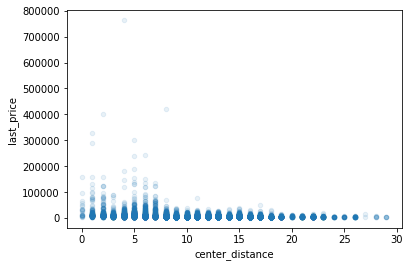

In [88]:
saint_p.plot(y='last_price', x='center_distance', kind='scatter', alpha=0.1) 

In [89]:
data['last_price'].corr(data['center_distance'])

-0.20191262316791014

**Вывод:** в среднем один километр до центра стоит 693722 руб., также стоит отметить, что между расстоянием до центра и стоимостью объекта прослеживается небольшая (слабая) зависимость: при уменьшении расстояния до центра увеличивается цена.

### Общий вывод

В результате работы были определены особенности объектов, размещенных в объявлениях:  
* в основном площадь объектов составляет около 54 кв. метров
* значения жилой площади варьируются от 12 до 409.7 кв метров, чаще всего жилая площадь составляет около 30 кв. метров
* площадь кухонь в квартирах в основном составляет примерно 10 кв. метров
* цены на объекты варьируются от 12190 до 763000000 рублей, в основном значения стоимости объектов концентрируется около 4650000 руб.
* больше всего объектов с 1-2 комнатами, редко встечаются объекты с более 6 комнатами
* высота потолков объектов варьируется от 1 до 14 метров, чаще всего можно встретить потолки около 2.65 метров, очень редко - полотки от 4 метров высотой
* большая часть объектов расположена на 1-5 этажах
* в основном встречаются объекты в домах с 5 этажами, также достаточно много объектов в девятиэтажках, очень редко встречаются объекты в домах с более чем 30 этажами
* расстояния от объекта до центра города варьируются от 181м до 65968м, больше всего объектов, которые расположены в пределах примерно 10000-17000м от центра
* расстояния до ближайших аэропортов варьируются от 6450 до 84869, большая часть объектов расположена достаточно далеко от аэропортов - на расстоянии около 19000м 
* большая часть объектов расположена примерно в 290-600м от парка
* чаще всего объявления публиковали в четверг и вторник, меньше всего публикаций приходилось на выходные, большая часть объявлений была опубликована в ферале-марте, реже всего делают публикации в мае
* продажа объекта обычно занимает около 95 дней, если же объявление провисело меньше 42 дней, то такую продажу можно назвать быстрой, необычайно долгие продажи - те, которые занимают более 238 дней
  
Были также выявлены факторы, влияющие на стоимость квартир. Больше всего на цену влияет общая площадь объекта (по мере возрастания общей площади увеличивается цена), тип этажа (средняя стоимость объектов на первых этажах ялвяется наименьшей, далее идут объекты на других этажах, а на последних этажах располагаются самые дорогие объекты) а также год публикации объявления о продаже (прослеживается снижение стоимости обектов по мере повышения года (кроме 2019 года)).
  
В работе был проведен анализ населенных пунктов с наибольшим количеством объявлений, выяснилось, что среди таких городов самая высокая средняя стоимость наблюдается в Санкт-Петербурге, Пушкине и Сестрорецке, меньше всего средняя цена за квадратный метр в Колпино, Ломоносове и Красном Селе.
  
Также была расчитана средняя цена за километр (близости к центру) в Санкт-Петербурге, она составляет 693722 руб., также стоит отметить, что между расстоянием до центра и стоимостью объекта прослеживается небольшая (слабая) зависимость: при уменьшении расстояния до центра увеличивается цена.

**Чек-лист готовности проекта**

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  открыт файл
- [x]  файлы изучены (выведены первые строки, метод `info()`, гистограммы и т.д.)
- [x]  определены пропущенные значения
- [x]  заполнены пропущенные значения там, где это возможно
- [x]  есть пояснение, какие пропущенные значения обнаружены
- [x]  изменены типы данных
- [x]  есть пояснение, в каких столбцах изменены типы и почему
- [x]  устранены неявные дубликаты в названиях населённых пунктов
- [x]  устранены редкие и выбивающиеся значения (аномалии) во всех столбцах
- [x]  посчитано и добавлено в таблицу: цена одного квадратного метра
- [x]  посчитано и добавлено в таблицу: день публикации объявления (0 - понедельник, 1 - вторник и т.д.)
- [x]  посчитано и добавлено в таблицу: месяц публикации объявления
- [x]  посчитано и добавлено в таблицу: год публикации объявления
- [x]  посчитано и добавлено в таблицу: тип этажа квартиры (значения — «первый», «последний», «другой»)
- [x]  посчитано и добавлено в таблицу: расстояние в км до центра города
- [x]  изучены и описаны следующие параметры:
        - общая площадь;
        - жилая площадь;
        - площадь кухни;
        - цена объекта;
        - количество комнат;
        - высота потолков;
        - этаж квартиры;
        - тип этажа квартиры («первый», «последний», «другой»);
        - общее количество этажей в доме;
        - расстояние до центра города в метрах;
        - расстояние до ближайшего аэропорта;
        - расстояние до ближайшего парка;
        - день и месяц публикации объявления
- [x]  построены гистограммы для каждого параметра
- [x]  выполнено задание: "Изучите, как быстро продавались квартиры (столбец days_exposition). Этот параметр показывает, сколько дней «висело» каждое объявление.
    - Постройте гистограмму.
    - Посчитайте среднее и медиану.
    - В ячейке типа markdown опишите, сколько обычно занимает продажа. Какие продажи можно считать быстрыми, а какие — необычно долгими?"
- [x]  выполнено задание: "Какие факторы больше всего влияют на общую (полную) стоимость объекта? Постройте графики, которые покажут зависимость цены от указанных ниже параметров. Для подготовки данных перед визуализацией вы можете использовать сводные таблицы."
        - общей площади;
        - жилой площади;
        - площади кухни;
        - количество комнат;
        - типа этажа, на котором расположена квартира (первый, последний, другой);
        - даты размещения (день недели, месяц, год);
- [x]  выполнено задание: "Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделите населённые пункты с самой высокой и низкой стоимостью квадратного метра. Эти данные можно найти по имени в столбце `locality_name`."
- [x]  выполнено задание: "Ранее вы посчитали расстояние до центра в километрах. Теперь выделите квартиры в Санкт-Петербурге с помощью столбца `locality_name` и вычислите среднюю цену каждого километра. Опишите, как стоимость объектов зависит от расстояния до центра города."
- [x]  в каждом этапе есть промежуточные выводы
- [x]  есть общий вывод